In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import glob
import os

from scipy import signal
from scipy.fft import fft, fftfreq

import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


   time   ch1   ch2   ch3
0   0.0  1.75  1.47  1.42
1   1.0  1.73  1.47  1.59
2   3.0  0.44  1.47  1.39
3   5.0  0.00  1.47  1.32
4   7.0  0.00  1.48  0.88
   time   ch1   ch2   ch3
0   1.0  1.18  2.22  1.62
1   3.0  1.46  2.23  1.62
2   5.0  1.42  2.15  1.45
3   7.0  1.22  2.16  1.55
4   9.0  1.08  1.99  1.54
   time   ch1   ch2   ch3
0   1.0  1.37  1.51  1.77
1   3.0  1.39  1.48  1.95
2   5.0  1.43  1.34  1.92
3   7.0  1.39  1.53  2.01
4   9.0  1.51  1.44  1.98


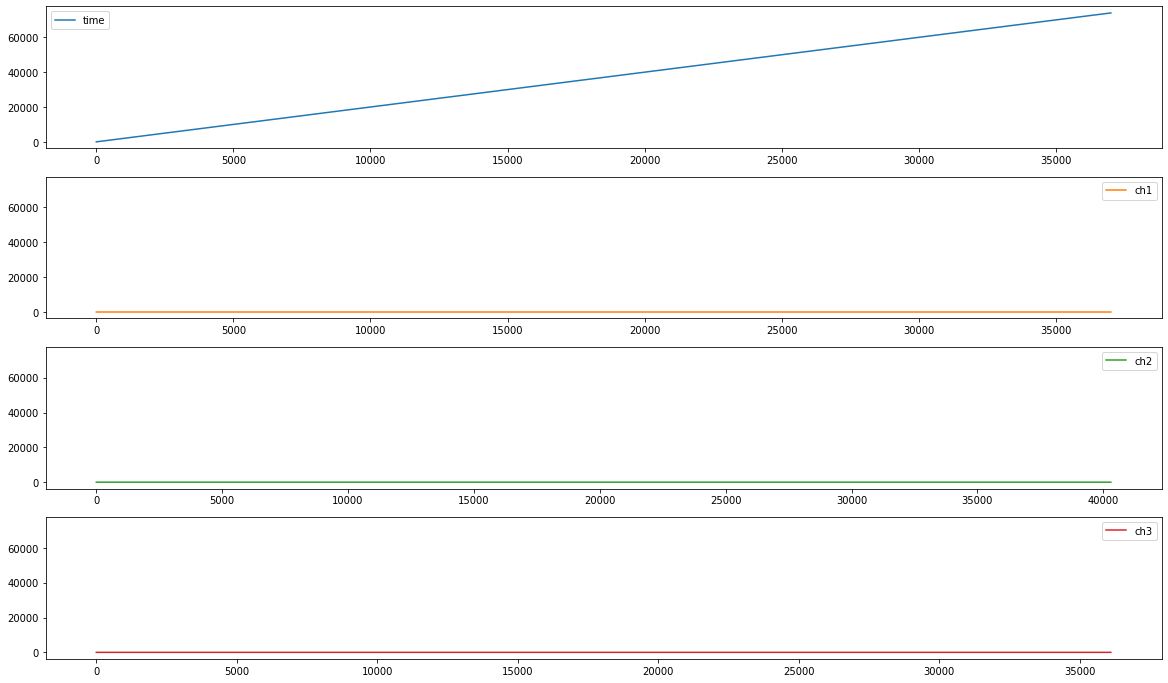

In [3]:
df1 = pd.read_csv('dataset/20211212/no-ch1.csv')
df2 = pd.read_csv('dataset/20211212/no-ch2.csv')
df3 = pd.read_csv('dataset/20211212/no-ch3.csv')

df4 = pd.concat([df1, df2['ch2'], df3['ch3']], axis=1)
print(df4.head())

ax = df4.plot(subplots=True, sharex=False, sharey=True, figsize=(20, 12))

df1 = pd.read_csv('dataset/20211212/yes-ch1.csv')
df2 = pd.read_csv('dataset/20211212/yes-ch2.csv')
df3 = pd.read_csv('dataset/20211212/yes-ch3.csv')

df5 = pd.concat([df1, df2['ch2'], df3['ch3']], axis=1)
print(df5.head())


df1 = pd.read_csv('dataset/20211212/start-ch1.csv')
df2 = pd.read_csv('dataset/20211212/start-ch2.csv')
df3 = pd.read_csv('dataset/20211212/start-ch3.csv')

df6 = pd.concat([df1, df2['ch2'], df3['ch3']], axis=1)
print(df6.head())

In [148]:
n = 5000
train_data = []

# no
for i in range(20):
    train_data.append(np.concatenate([np.array(df4['ch1'][n:n+1000].values), np.array(df4['ch2'][n:n+1000].values), np.array(df4['ch3'][n:n+1000].values)]))
    n = n + 1000

n = 5000
for i in range(20):
    train_data.append(np.concatenate([np.array(df5['ch1'][n:n+1000].values), np.array(df5['ch2'][n:n+1000].values), np.array(df5['ch3'][n:n+1000].values)]))
    n = n + 1000

n = 5000
for i in range(20):
    train_data.append(np.concatenate([np.array(df6['ch1'][n:n+1000].values), np.array(df6['ch2'][n:n+1000].values), np.array(df6['ch3'][n:n+1000].values)]))
    n = n + 1000
    
print(len(train_data))
print(len(train_data[58]))

60
3000


In [149]:
label_data = np.concatenate([np.zeros(15), np.ones(15), np.full(15, 2)])

y_train = tf.keras.utils.to_categorical(label_data)
print(y_train)

test_label_data = np.concatenate([np.zeros(3), np.ones(3), np.full(3, 2)])
y_test = tf.keras.utils.to_categorical(test_label_data)
print(y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [159]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras import optimizers

train_X = np.concatenate([train_data[0:15], train_data[20:35], train_data[40:55]])

print(len(train_X))
print(train_X.shape)

# モデルの作成
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(3000,)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='ADAM',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

45
(45, 3000)
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 100)               300100    
                                                                 
 flatten_22 (Flatten)        (None, 100)               0         
                                                                 
 dense_111 (Dense)           (None, 100)               10100     
                                                                 
 dropout_66 (Dropout)        (None, 100)               0         
                                                                 
 dense_112 (Dense)           (None, 100)               10100     
                                                                 
 dropout_67 (Dropout)        (None, 100)               0         
                                                                 
 dense_113 (Dense)           (None, 3) 

In [160]:
history = model.fit(train_X, y_train,
                    batch_size=128,   # 64,128みたいに2の倍数がよく使われるらしい
                    epochs=200,
                    verbose=2,
                    validation_split=0.1)

Epoch 1/200
1/1 - 0s - loss: 2.5704 - accuracy: 0.3000 - val_loss: 2.1614 - val_accuracy: 0.0000e+00 - 468ms/epoch - 468ms/step
Epoch 2/200
1/1 - 0s - loss: 1.5944 - accuracy: 0.3750 - val_loss: 0.6951 - val_accuracy: 1.0000 - 25ms/epoch - 25ms/step
Epoch 3/200
1/1 - 0s - loss: 1.7155 - accuracy: 0.2750 - val_loss: 1.4616 - val_accuracy: 0.0000e+00 - 24ms/epoch - 24ms/step
Epoch 4/200
1/1 - 0s - loss: 1.2609 - accuracy: 0.5000 - val_loss: 2.4982 - val_accuracy: 0.0000e+00 - 24ms/epoch - 24ms/step
Epoch 5/200
1/1 - 0s - loss: 1.6035 - accuracy: 0.3750 - val_loss: 2.2067 - val_accuracy: 0.0000e+00 - 24ms/epoch - 24ms/step
Epoch 6/200
1/1 - 0s - loss: 1.7532 - accuracy: 0.4000 - val_loss: 2.1660 - val_accuracy: 0.0000e+00 - 24ms/epoch - 24ms/step
Epoch 7/200
1/1 - 0s - loss: 1.1666 - accuracy: 0.4500 - val_loss: 1.7401 - val_accuracy: 0.0000e+00 - 25ms/epoch - 25ms/step
Epoch 8/200
1/1 - 0s - loss: 1.2674 - accuracy: 0.4000 - val_loss: 1.7178 - val_accuracy: 0.0000e+00 - 24ms/epoch - 24ms

Text(0.5, 0, 'epoch')

<Figure size 432x288 with 0 Axes>

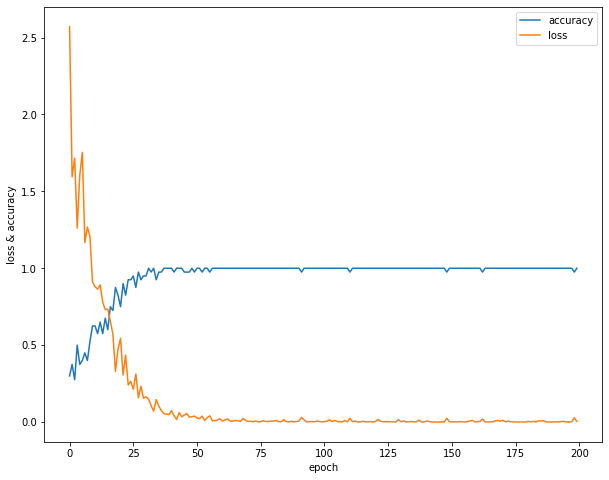

In [161]:
import matplotlib.pyplot as plt

hist_df = pd.DataFrame(history.history)
plt.figure()
hist_df[['accuracy', 'loss']].plot(figsize=(10,8))
plt.ylabel('loss & accuracy')
plt.xlabel('epoch')

In [162]:
test_X = np.concatenate([train_data[15:18], train_data[35:38], train_data[55:58]], 0)

print("Evaluate on test data")
results = model.evaluate(test_X, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(test_X[0:7])
print("predictions shape:", predictions)


Evaluate on test data
1/1 [==============================] - 0s 21ms/step - loss: 0.5517 - accuracy: 0.7778
test loss, test acc: [0.5516889691352844, 0.7777777910232544]
predictions shape: [[9.9996316e-01 3.1928076e-09 3.6842794e-05]
 [3.4575954e-02 9.6542394e-01 1.2645441e-07]
 [9.9769068e-01 1.0835129e-06 2.3082723e-03]
 [4.5960912e-04 5.8253837e-01 4.1700202e-01]
 [7.3950298e-02 9.2604661e-01 3.1195614e-06]
 [2.7702122e-03 9.9607736e-01 1.1523627e-03]
 [3.0393109e-03 6.2057078e-01 3.7638995e-01]]
